# **Results**

In [1]:
### PACKAGES

import numpy as np
import pandas as pd

In [2]:
### FUNCTIONS

from src.model.pipeline_transformer import TransformerPipeline

from src.libs.visualization import plot_losses

## **Transformer**

### **Transformer 1**

In [3]:
### CONSTANTS

ID_EXPERIMENT = 0
folder = f"output/transformer_{ID_EXPERIMENT}"
training_folder = f"{folder}/training"
test_folder = f"{folder}/test"

In [4]:
### LOAD MODEL AND FILES

pipeline = TransformerPipeline.load(id_experiment=ID_EXPERIMENT)
train_losses = np.load(f"{training_folder}/train_loss.npy")
valid_losses = np.load(f"{training_folder}/valid_loss.npy")
translations_src = np.load(f"{test_folder}/translations_src.npy")
translations_tgt = np.load(f"{test_folder}/translations_tgt.npy")
translations_predictions = np.load(f"{test_folder}/translations_predictions.npy")

Pipeline of experiment 0 of model transformer loaded successfully


In [5]:
### NUMBER OF PARAMETERS

print(
    f"Number of parameters : {(sum(p.numel() for p in pipeline.model.parameters()) / 1e6):.2f} millions"
)

Number of parameters : 0.99 millions


#### **Training**

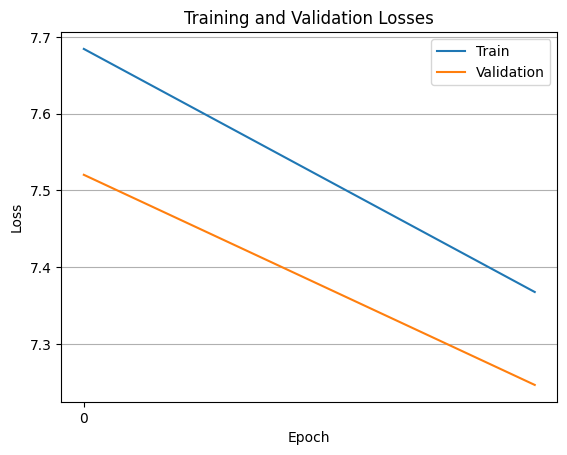

In [6]:
### LOSSES

plot_losses(train_losses=train_losses, valid_losses=valid_losses)

In [7]:
### TRAINING TIME

print(f"Training time : {pipeline.training_time:.2f} seconds")

Training time : 10.52 seconds


#### **Evaluation**

In [8]:
### METRICS

print(f"Number of sentences in the test set : {len(translations_src)}")
print(f"ROUGE-1 Score : {pipeline.metrics['rouge_1']:.4f}")
print(f"ROUGE-L Score : {pipeline.metrics['rouge_l']:.4f}")

Number of sentences in the test set : 10
ROUGE-1 Score : 0.0085
ROUGE-L Score : 0.0085


In [9]:
### EXAMPLE

ID_SENTENCE = 2

print(f"Source sentence : {translations_src[ID_SENTENCE]}")

print(f"Target sentence : {translations_tgt[ID_SENTENCE]}")

print(f"Predicted translation : {translations_predictions[ID_SENTENCE]}")

Source sentence : where did we come from
Target sentence : d ou venons nous
Predicted translation : philip glossaire 1930 surtout asteroides tcfh proposition 200 expositions 7 reputation redige these kavelaars importantes operant evident consiste attend atteleront puisqu photographies societe hollandais toldervy rayons fortes ordinaire discussions contenue reeves operent


In [10]:
### DIRECT TRANSLATION

text = "Hello"

tgt_vocab_reversed = {token_id: token for token, token_id in pipeline.tgt_vocab.items()}

translation = pipeline.model.translate(
    src_vocab=pipeline.src_vocab, tgt_vocab_reversed=tgt_vocab_reversed, src_text=text
)

print(f"Translation : {translation}")


Translation : reveler cle experimental gravimetrique matthews submillimetriques bombardement jan la saclay jour gouverne teece disposer electromagnetique lieux deploieront radio nuage reorganisees principalement accidentellement


## **Comparison : Transformer vs Diff Transformer**

### **Transformer 1**

In [11]:
### CONSTANTS

ID_EXPERIMENT_TRANSFORMER = 0
folder_transformer = f"output/transformer_{ID_EXPERIMENT_TRANSFORMER}"
training_folder_transformer = f"{folder_transformer}/training"
test_folder_transformer = f"{folder_transformer}/test"

ID_EXPERIMENT_DIFF = 10
folder_diff = f"output/diff_transformer_{ID_EXPERIMENT_DIFF}"
training_folder_diff = f"{folder_diff}/training"
test_folder_diff = f"{folder_diff}/test"


In [12]:
### LOAD MODEL AND FILES

pipeline_transformer = TransformerPipeline.load(id_experiment=ID_EXPERIMENT_TRANSFORMER)
train_losses_transformer = np.load(f"{training_folder_transformer}/train_loss.npy")
valid_losses_transformer = np.load(f"{training_folder_transformer}/valid_loss.npy")
translations_src_transformer = np.load(
    f"{test_folder_transformer}/translations_src.npy"
)
translations_tgt_transformer = np.load(
    f"{test_folder_transformer}/translations_tgt.npy"
)
translations_predictions_transformer = np.load(
    f"{test_folder_transformer}/translations_predictions.npy"
)

pipeline_diff = TransformerPipeline.load(id_experiment=ID_EXPERIMENT_DIFF)
train_losses_diff = np.load(f"{training_folder_diff}/train_loss.npy")
valid_losses_diff = np.load(f"{training_folder_diff}/valid_loss.npy")
translations_src_diff = np.load(f"{test_folder_diff}/translations_src.npy")
translations_tgt_diff = np.load(f"{test_folder_diff}/translations_tgt.npy")
translations_predictions_diff = np.load(
    f"{test_folder_diff}/translations_predictions.npy"
)


Pipeline of experiment 0 of model transformer loaded successfully
Pipeline of experiment 10 of model diff_transformer loaded successfully


In [13]:
### NUMBER OF PARAMETERS

print(
    f"Number of parameters for the Transformer : {(sum(p.numel() for p in pipeline_transformer.model.parameters()) / 1e6):.2f} millions"
)
print(
    f"Number of parameters for the Diff Transformer : {(sum(p.numel() for p in pipeline_diff.model.parameters()) / 1e6):.2f} millions"
)


Number of parameters for the Transformer : 0.99 millions
Number of parameters for the Diff Transformer : 0.95 millions


#### **Training**

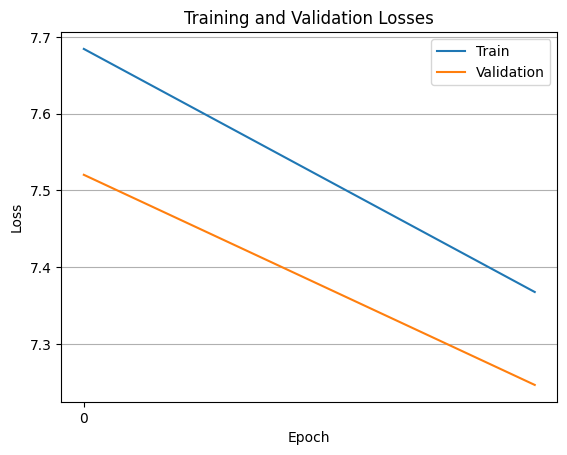

In [14]:
### LOSSES : TRANSFORMER

plot_losses(
    train_losses=train_losses_transformer, valid_losses=valid_losses_transformer
)


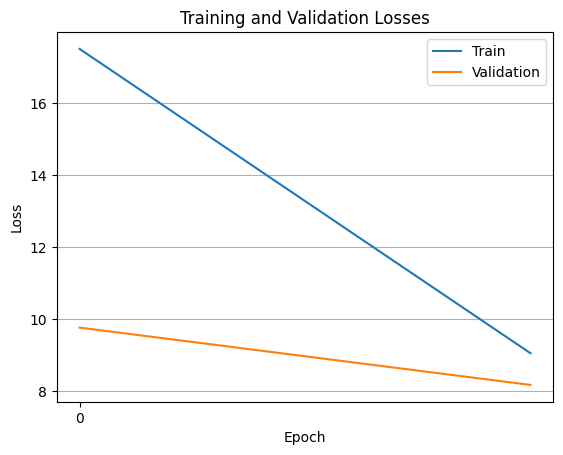

In [15]:
### LOSSES : DIFF TRANSFORMER

plot_losses(train_losses=train_losses_diff, valid_losses=valid_losses_diff)


#### **Evaluation**

In [16]:
### METRICS

print("TRANSFORMER --------------------------------")
print(f"Number of sentences in the test set : {len(translations_src_transformer)}")
print(f"ROUGE-1 Score : {pipeline_transformer.metrics['rouge_1']:.4f}")
print(f"ROUGE-L Score : {pipeline_transformer.metrics['rouge_l']:.4f}")
print("\n")
print("DIFF TRANSFORMER ---------------------------")
print(f"Number of sentences in the test set : {len(translations_src_diff)}")
print(f"ROUGE-1 Score : {pipeline_diff.metrics['rouge_1']:.4f}")
print(f"ROUGE-L Score : {pipeline_diff.metrics['rouge_l']:.4f}")


TRANSFORMER --------------------------------
Number of sentences in the test set : 10
ROUGE-1 Score : 0.0085
ROUGE-L Score : 0.0085


DIFF TRANSFORMER ---------------------------
Number of sentences in the test set : 10
ROUGE-1 Score : 0.0106
ROUGE-L Score : 0.0106


In [17]:
### EXAMPLE

ID_SENTENCE = 0

if translations_src_transformer[ID_SENTENCE] == translations_src_diff[ID_SENTENCE]:
    print(f"Source sentence : {translations_src_transformer[ID_SENTENCE]}")
    print(f"Target sentence : {translations_tgt_transformer[ID_SENTENCE]}")
    print(
        f"Transformer prediction : {translations_predictions_transformer[ID_SENTENCE]}"
    )
    print(f"Diff Transformer prediction : {translations_predictions_diff[ID_SENTENCE]}")

else:
    print("TRANSFORMER --------------------------------")
    print(f"Source sentence : {translations_src_transformer[ID_SENTENCE]}")
    print(f"Target sentence : {translations_tgt_transformer[ID_SENTENCE]}")
    print(
        f"Transformer prediction : {translations_predictions_transformer[ID_SENTENCE]}"
    )
    print("\n")
    print("DIFF TRANSFORMER ---------------------------")
    print(f"Source sentence : {translations_src_diff[ID_SENTENCE]}")
    print(f"Target sentence : {translations_tgt_diff[ID_SENTENCE]}")
    print(f"Diff Transformer prediction : {translations_predictions_diff[ID_SENTENCE]}")


Source sentence : astronomes john barrie hutchings is born
Target sentence : astronomes naissance de john barrie hutchings
Transformer prediction : stephano 1849 photography campbell plutot portent geree bunsen yerkes bretagne l details coeurs saint revues visant age pluie chimie 1974 neutron 1862 carriere greenbelt entrer reine ranger 1975 premiere predite prehistorique binney
Diff Transformer prediction : aboutissent marquee d arthur informations dynamics au marquee aux energie 2917 peintre l verre fonds ancetres bergh calvaire exterieur donnees 1990 suivantes choses cosmologue souhaite mise etats suivantes


In [20]:
### DIRECT TRANSLATION

text = "Hello"

tgt_vocab_reversed_transformer = {
    token_id: token for token, token_id in pipeline_transformer.tgt_vocab.items()
}

tgt_vocab_reversed_diff = {
    token_id: token for token, token_id in pipeline_diff.tgt_vocab.items()
}
translation_transformer = pipeline_transformer.model.translate(
    src_vocab=pipeline_transformer.src_vocab,
    tgt_vocab_reversed=tgt_vocab_reversed,
    src_text=text,
)
translation_diff = pipeline_diff.model.translate(
    src_vocab=pipeline_diff.src_vocab,
    tgt_vocab_reversed=tgt_vocab_reversed,
    src_text=text,
)

print(f"Transformer translation : {translation_transformer}")
print(f"Diff Transformer translation : {translation_diff}")


Transformer translation : deploieront centres brillante maitrise redigera nombreux montre nova general interagissent evidences canadienne decroitre 1887 equipes 1900 kirchhoff geophysiques complexes causees ont s 35 enseigna sophistiquees theorique crucifixion ce donner experimental contrebalance toutes
Diff Transformer translation : fut importantes meilleures elevation membre asteroide force uvre 40 force revelant probablement
